In [2]:
# import libraries 
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Set style for plots
plt.style.use('ggplot')

In [5]:
#Load Stock Data
df = yf.download('AAPL', start='2019-01-01', end='2024-01-01')
df.reset_index(inplace=True)

C:\Users\91866\AppData\Local\Temp\ipykernel_8500\3068873302.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL', start='2019-01-01', end='2024-01-01')
[*********************100%***********************]  1 of 1 completed


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   (Date, )        1258 non-null   datetime64[ns]
 1   (Close, AAPL)   1258 non-null   float64       
 2   (High, AAPL)    1258 non-null   float64       
 3   (Low, AAPL)     1258 non-null   float64       
 4   (Open, AAPL)    1258 non-null   float64       
 5   (Volume, AAPL)  1258 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 59.1 KB
None


In [7]:
print(df.describe())

Price                            Date        Close         High          Low  \
Ticker                                        AAPL         AAPL         AAPL   
count                            1258  1258.000000  1258.000000  1258.000000   
mean    2021-06-30 18:48:38.918918912   120.684961   121.948762   119.282557   
min               2019-01-02 00:00:00    33.870842    34.711717    33.825582   
25%               2020-04-01 06:00:00    74.842871    75.465216    73.774026   
50%               2021-06-30 12:00:00   131.693466   133.129908   130.327033   
75%               2022-09-28 18:00:00   157.062790   159.681290   154.910775   
max               2023-12-29 00:00:00   196.669769   198.168786   195.567849   
std                               NaN    46.477971    46.884623    46.043335   

Price          Open        Volume  
Ticker         AAPL          AAPL  
count   1258.000000  1.258000e+03  
mean     120.562025  1.015904e+08  
min       34.297233  2.404830e+07  
25%       74.433454

In [16]:
# Data Cleaning
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")
df.drop_duplicates(inplace=True)

Number of duplicate rows: 0


In [17]:
# Dropping missing values
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)
df.dropna(inplace=True)

Missing values per column:
 Price         Ticker
Date                    0
Close         AAPL      0
High          AAPL      0
Low           AAPL      0
Open          AAPL      0
Volume        AAPL      0
Daily Return            0
MA20                    0
MA50                    0
Month                   0
dtype: int64


In [19]:
# Top Best and Worst months
monthly_returns = df.groupby('Month')['Daily Return'].mean().sort_values()
print("Top 5 Worst Months:\n", monthly_returns.head())
print("Top 5 Best Months:\n", monthly_returns.tail())

Top 5 Worst Months:
 Month
2020-02   -0.006109
2022-12   -0.006033
2022-09   -0.005864
2019-05   -0.005795
2022-04   -0.004878
Freq: M, Name: Daily Return, dtype: float64
Top 5 Best Months:
 Month
2020-06    0.006459
2020-07    0.007314
2020-04    0.007339
2022-07    0.008792
2020-08    0.009566
Freq: M, Name: Daily Return, dtype: float64


In [20]:
# Feature Engineering 
df['Daily Return'] = df['Close'].pct_change()
df['MA20'] = df['Close'].rolling(window=20).mean()
df['MA50'] = df['Close'].rolling(window=50).mean()
df['Month'] = df['Date'].dt.to_period('M')

In [ ]:
# Visualization

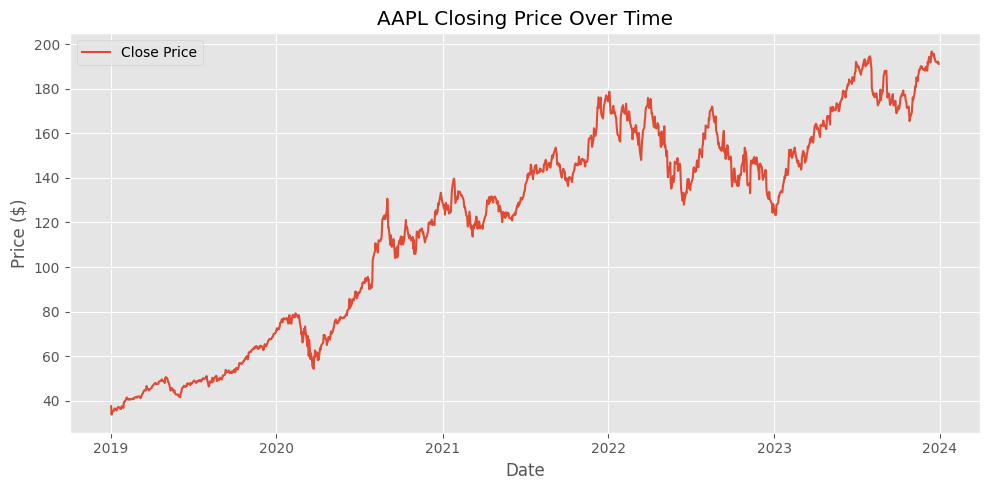

In [9]:
# A. Closing Price Over Time
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.title("AAPL Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.tight_layout()
plt.show()

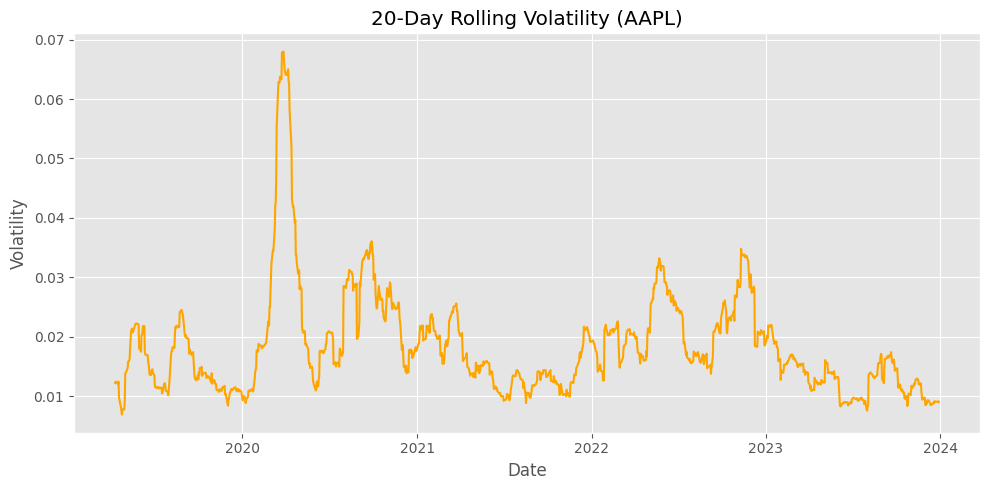

In [18]:
# B. Rolling Volatility (20-day)
df['Volatility_20d'] = df['Daily Return'].rolling(window=20).std()

plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Volatility_20d'], color='orange')
plt.title("20-Day Rolling Volatility (AAPL)")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.tight_layout()
plt.show()

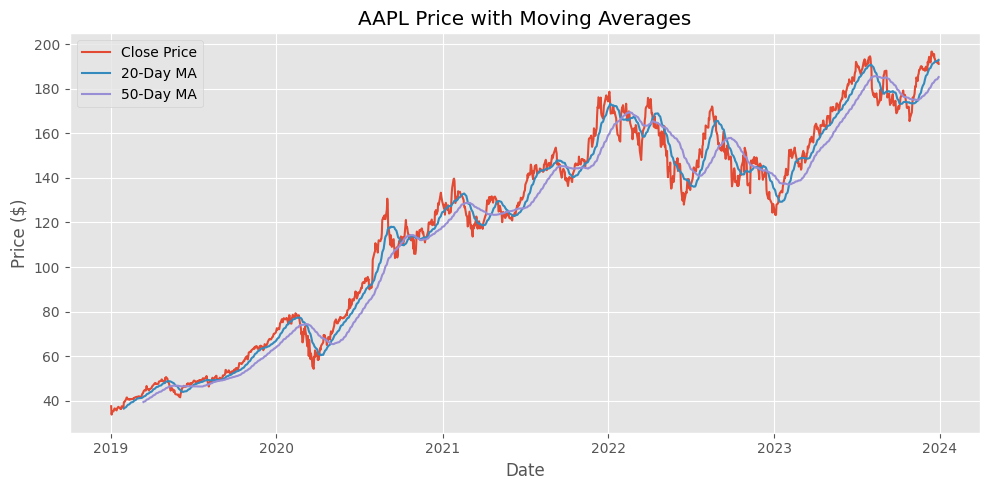

In [10]:
# C. Moving Averages
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.plot(df['Date'], df['MA20'], label='20-Day MA')
plt.plot(df['Date'], df['MA50'], label='50-Day MA')
plt.title("AAPL Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.tight_layout()
plt.show()

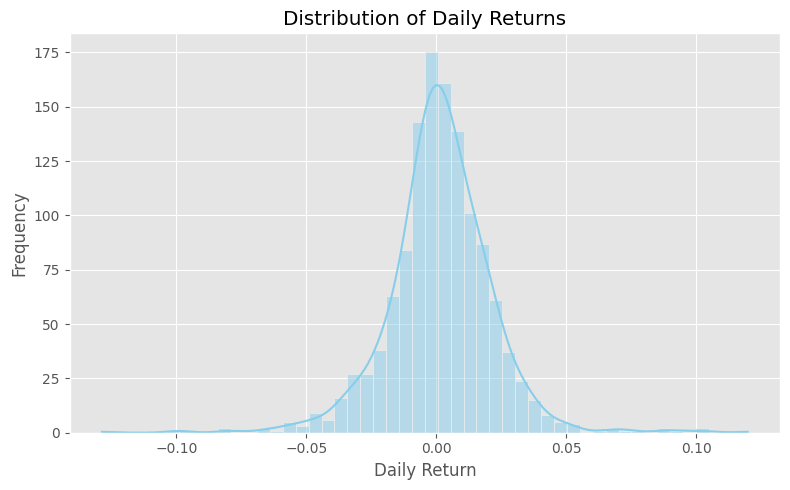

In [11]:
# D. Daily Return Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Daily Return'].dropna(), bins=50, kde=True, color='skyblue')
plt.title("Distribution of Daily Returns")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

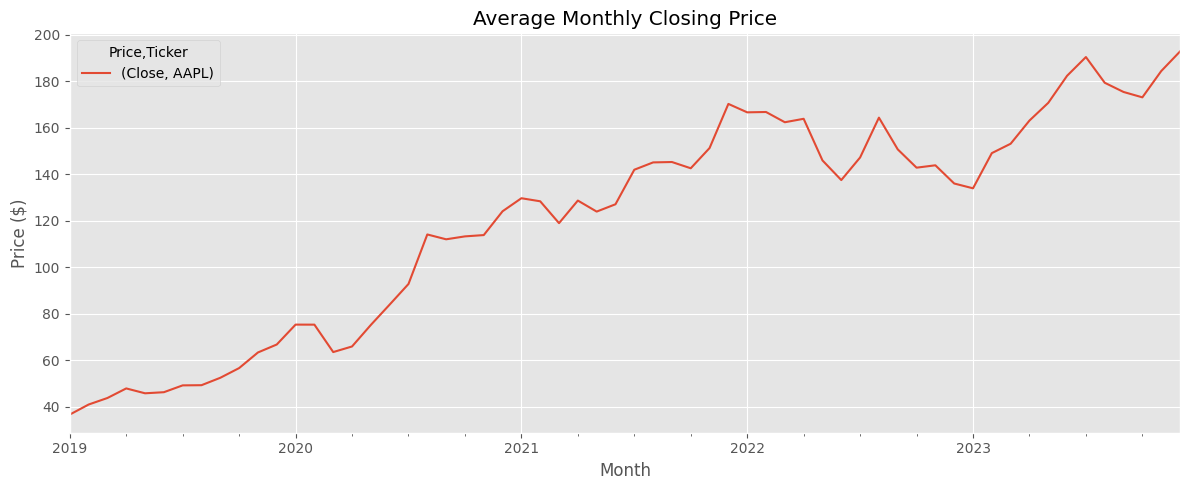

In [12]:
# E. Monthly Average Close Price
monthly_avg = df.groupby('Month')['Close'].mean()
monthly_avg.plot(figsize=(12, 5), title="Average Monthly Closing Price")
plt.ylabel("Price ($)")
plt.xlabel("Month")
plt.grid(True)
plt.tight_layout()
plt.show()